# Training a Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**This is the code for computing the dot product of input_vector and weights_1**

In [2]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

In [3]:
# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [4]:
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


The result of the dot product is 2.1672. Now that you know how to compute the dot product, it’s time to use np.dot() from NumPy. Here’s how to compute dot_product_1 using np.dot():

In [5]:
dot_product_1 = np.dot(input_vector, weights_1)

print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [6]:
# dot product for the second weight

dot_product_2 = np.dot(input_vector, weights_2)

print(f"The dot product is: {dot_product_2}")

The dot product is: 4.1259999999999994


since the dot product of input_vector and weights_2 is 4.1259, and 4.1259 is greater than 2.1672, it means that input_vector is more similar to weights_2.

In [7]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

In [10]:
prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


In [11]:
# Changing the value of input_vector
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


This time, the network made a wrong prediction. The result should be less than 0.5 since the target for this input is 0, but the raw result was 0.87. It made a wrong guess, but how bad was the mistake? The next step is to find a way to assess that.

# Computing the prediction error

In [12]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


In [13]:
# Using gradient descent to determine how to change the weights
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [1.7420383]


**The result is 1.74, a positive number, so you need to decrease the weights. You do that by subtracting the derivative result of the weights vector. Now you can update weights_1 accordingly and predict again to see how it affects the prediction result:**

In [14]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

# The mean squared error
error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01496248]; Error: [0.00022388]


Take the image of the quadratic function as an example. High increments aren’t ideal because you could keep going from point A straight to point B, never getting close to zero. To cope with that, you update the weights with a fraction of the derivative result.

To define a fraction for updating the weights, you use the alpha parameter, also called the learning rate. If you decrease the learning rate, then the increments are smaller. If you increase it, then the steps are higher. How do you know what’s the best learning rate value? By making a guess and experimenting with it.

In [15]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

To update the weights, you follow the same process, going backward and taking the partial derivatives until you get to the weights variable. Since you’ve already computed some of the partial derivatives, you’ll just need to compute dlayer1_dweights. The derivative of the dot product is the derivative of the first vector multiplied by the second vector, plus the derivative of the second vector multiplied by the first vector.

# Creating the neural network class

In [16]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

In [17]:
input_vector

array([2. , 1.5])

In [18]:
# If you want to make a prediction, first you create an instance of NeuralNetwork(), and then you call .predict():
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.2513632743122389

# Training the network with more data

 Stochastic gradient descent is a technique in which, at every iteration, the model makes a prediction based on a randomly selected piece of training data, calculates the error, and updates the parameters.

Now it’s time to create the train() method of your NeuralNetwork class. You’ll save the error over all data points every 100 iterations because you want to plot a chart showing how this metric changes as the number of iterations increases. This is the final train() method of your neural network:

In [19]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

you pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.

In [20]:
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

 use a dataset with just eight instances, the input_vectors array. Now you can call train() and use Matplotlib to plot the cumulative error for each iteration:



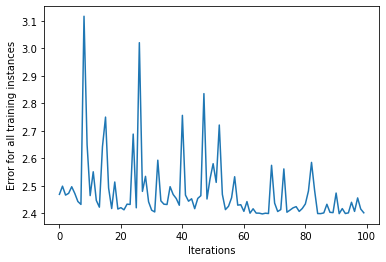

In [21]:
neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

You instantiate the NeuralNetwork class again and call train() using the input_vectors and the target values. You specify that it should run 10000 times. This is the graph showing the error for an instance of a neural network:

# Conclusion
The overall error is decreasing, which is what you want. After the largest decrease, the error keeps going up and down quickly from one interaction to another. That’s because the dataset is random and very small, so it’s hard for the neural network to extract any features.

But it’s not a good idea to evaluate the performance using this metric because you’re evaluating it using data instances that the network already saw. This can lead to overfitting, when the model fits the training dataset so well that it doesn’t generalize to new data.